# CPL 5559 -B220 - CPL -Applied Project

## Libraries

In [1]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [3]:
#for other pyhon modules
import import_ipynb

In [4]:
import DEF_MFS_MVP_Storage as mDB

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb


## Python Classes

### Define Class to input tickers

In [5]:
class Ticker:
    
    def get_tickername(self):
        ticker_number=int(input("Enter number of tickers you want"))
        tickers=[]
        for i in range(ticker_number):
            ticker=input("Enter ticker symbol:")
            tickers.append(ticker)
        tickers=" ".join(tickers)
        return tickers
    

### Define class for yahoo finance

In [6]:
class yfinance:
    
    #constructor to initialize instance variables
    def __init__(self,ticker, start_date,end_date):
        #ticker: stock ticker symbol
        #star_date : start date from when the stock prices is to be extracted
        #end_date : final date upto which the stock prices is to be extracted
        self.ticker=ticker
        self.start=start_date
        self.end=end_date
        
    #instance method to extract stock prices of a any one ticker
    def get_stockmarketdata_indv(self):
        # for individual ticker we use the yf.ticker module
        #yf.Ticker to create a ticker object for a particular ticker
        stock = yf.Ticker(self.ticker)
        #print(stock.info)
        #.history to get historical market data
        stock_df = stock.history(period='1d',start=self.start, end=self.end,actions=False)
        #period ='1d' means we want to extract stock market data once every day between the specified dates
        return stock_df
    
    #instance method to extract stock prices for all specified tickers
    def get_stockmarketdata_all(self):
        #To download the historical data for multiple tickers at once you can use the download module.
        #converting to string
        merged_stock_df = yf.download(self.ticker,period='1d', start=self.start, end=self.end,group_by='tickers')
        return merged_stock_df

        

### Define Class for Displaying and Saving Outputs

In [7]:
class output:
    #class for displaying output and saving files
    def __init__(self,value,output_name):
        self.value=value
        self.name=output_name
        
    def output_print(self):
        #this function will print values, list, arrays and others
        print(self.value)
        
    def output_display(self):
        #this function will display pandas dataframe as a table
        display(self.value)
        
    def output_savecsv(self):
        #this functuion will save output as csv
        self.value.to_csv(self.name+".csv")
    
    def output_plot(self):
        #this function will make a line plot of all the stock market data
        open_close=self.value
        open_close.reset_index(inplace=True)
        open_close.plot(x="Date", y=["Open","Close"],figsize=(12, 12))
        plt.title("Line plot for open and closed stock market prices for : "+ self.name,fontsize=20)
        plt.xlabel("Date",fontsize=15)
        plt.ylabel("Stock market Data",fontsize=15)
        plt.show()
        

## Main


In [8]:
#initialize start and end date
start_date = "2021-01-01"
end_date = "2022-12-31"

### Tesla stock prices

In [9]:
#define a class object
tesla_Data = yfinance("TSLA", start_date, end_date)


In [10]:
#extract stock data by calling the class's instance method
Tesla=tesla_Data.get_stockmarketdata_indv()

In [11]:
type(Tesla)

pandas.core.frame.DataFrame

In [12]:
#show stock data in tabular form by calling class's instance method
Tesla_output=output(Tesla,"Tesla")
Tesla_output.output_display()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500


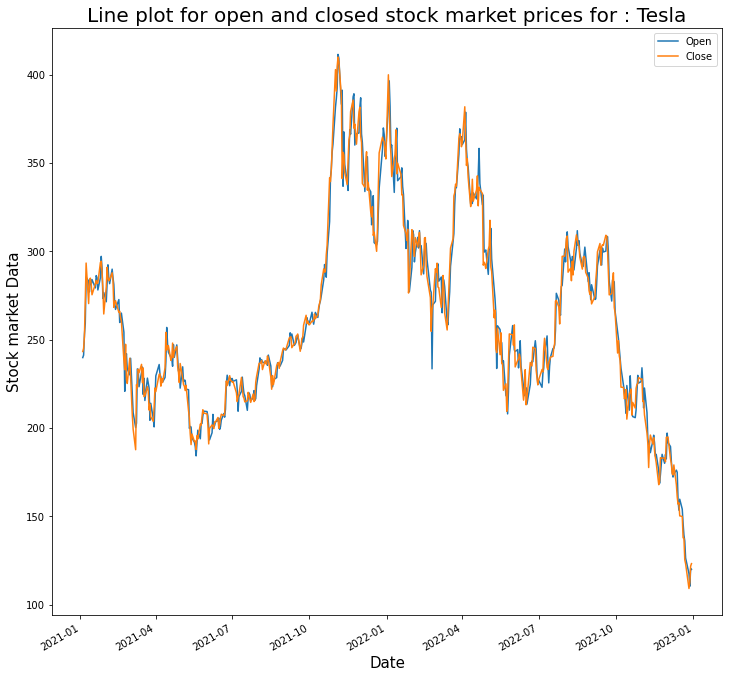

In [13]:
#show lineplot for open and close values
Tesla_output.output_plot()

In [14]:
#save to csv
Tesla_output.output_savecsv()

### Ford Stock Prices

In [15]:
#define class object for Ford
ford_Data = yfinance("F", start_date, end_date)

In [16]:
#extract stock data
Ford=ford_Data.get_stockmarketdata_indv()

In [17]:
#show stock data in tabular form by calling class's instance method
Ford_output=output(Ford,"Ford")
Ford_output.output_display()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,7.985666,8.012859,7.641222,7.722801,85043100
2021-01-05,7.677480,7.904088,7.668415,7.840637,70127800
2021-01-06,7.967538,8.103502,7.867830,8.012859,72590200
2021-01-07,8.103503,8.230404,8.049117,8.212276,77117100
2021-01-08,8.248532,8.284789,8.058181,8.157888,59162200
...,...,...,...,...,...
2022-12-23,10.601654,10.723943,10.554619,10.686316,38200700
2022-12-27,10.611060,10.714538,10.469956,10.535805,44837400
2022-12-28,10.516991,10.582840,10.253596,10.300631,49375400


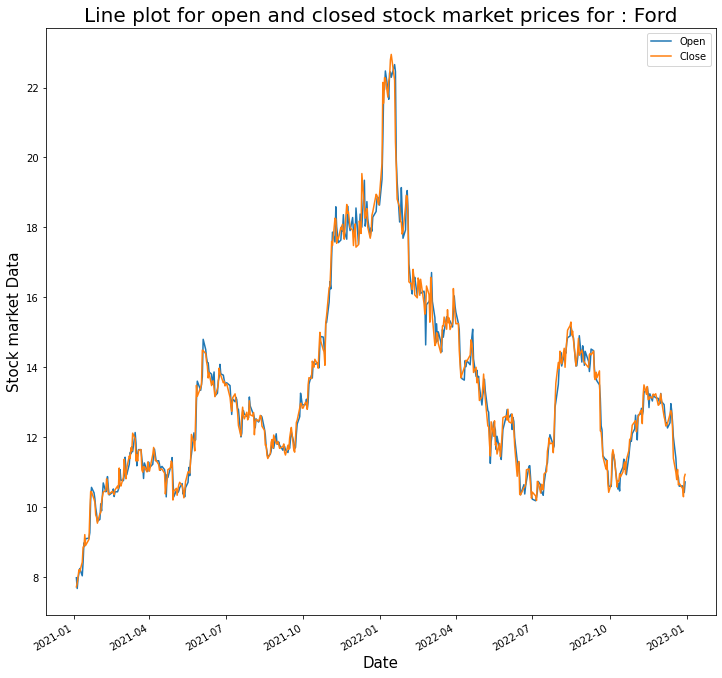

In [18]:
#show lineplot for open and close values
Ford_output.output_plot()

In [19]:
#save stock prices to csv
Ford_output.output_savecsv()

### Stock Prices for both Tesla and Ford

In [20]:
#input tickers using the Ticker class
Tick=Ticker()
tickers=Tick.get_tickername()
print(tickers)

Enter number of tickers you want2
Enter ticker symbol:TSLA
Enter ticker symbol:F
TSLA F


In [21]:
#define a class object
tesla_ford_Data = yfinance(tickers, start_date, end_date)

In [22]:
#extract stock data
Tesla_Ford=tesla_ford_Data.get_stockmarketdata_all()

[*********************100%***********************]  2 of 2 completed


In [23]:
#show stock data in tabularTesla_Ford form by calling class's instance method
Tsla_ford_output=output(Tesla_Ford,"Tesla_Ford")
Tsla_ford_output.output_display()

TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   
...                ...         ...         ...         ...         ...   
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

                           F                                            
               Volume   Open   High    Low  Close  Adj Close    Volume  
Date                                                                    
2021-01-04  145914600   8.81   8.84   8.43   8.52   7.722801  85043100  
2021-01-05   96735600   8.47   8.72   8.46   8.65   7.840637  70127800  
2021-01-06  134100000   8.79   8.94   8.68   8.84   8.012860  72590200  
2021-01-07  154496700   8.94   9.08   8.88   9.06   8.212275  77117100  
2021-01-08  225166500   9.10   9.14   8.89   9.00   8.157889  59162200  
...               ...    ...    ...    ...    ...        ...       ...  
2022-12-23  166989700  11.27  11.40  11.22  11.36  10.686316  38200700  
2022-12-27  208643400  11.28  11.39  11.13  11.20  10.535805  44837400  
2022-12-28  221070500  11.18  11.25  10.90  10.95  10.300631  49375400  
2022-12-29  221923300  11.08  11.55  11.05  11.54  10.855641  53550300  
2022-12-30  157304500  11.40  11.64  11.39  11.63  10.940305  39149700  

[503 rows x 12 columns]

In [24]:
#save stock prices to csv
Tsla_ford_output.output_savecsv()

### Create database, store data to database and fetch data from database

#### Tesla

In [25]:
#define class object
mongoDB=mDB.MongoDbAtlas()

In [26]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#create database and collection


In [27]:
#Tesla_collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [28]:
Tesla_collection

Collection(Database(MongoClient(host=['ac-3nkf60w-shard-00-02.pvo8fhv.mongodb.net:27017', 'ac-3nkf60w-shard-00-01.pvo8fhv.mongodb.net:27017', 'ac-3nkf60w-shard-00-00.pvo8fhv.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-14dt05-shard-0', tls=True), 'DEF-MFS-MVP-Stocks'), 'DEF-MFS-MVP-Tesla')

In [29]:
#store the stock price data into the database
mongoDB.store_stockdata(Tesla,Tesla_collection)

Backend at MongoDb Atlas 

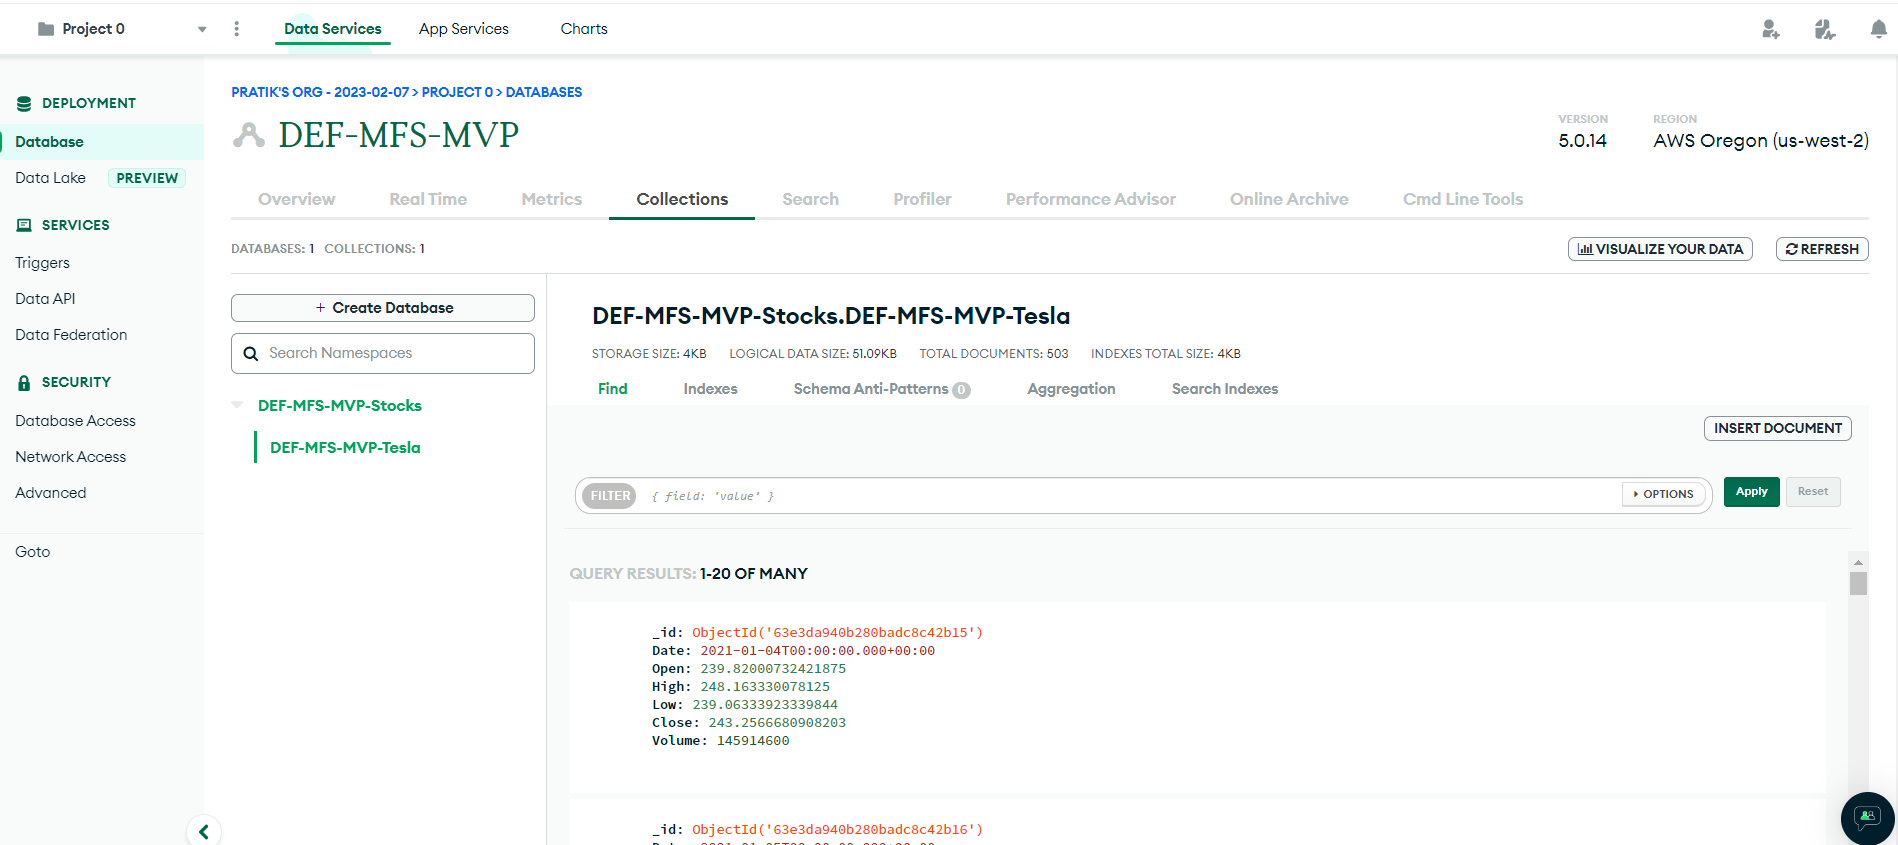

In [30]:
#retrive stock markey data as list of dictionaries and dataframe
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [31]:
#dic_from_db

In [32]:
#df_from_db

In [33]:
#we use output class
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_tesla,Tesla)
op.output_display()

[{'_id': ObjectId('63ed782891778c9eaefd505f'),
  'Date': datetime.datetime(2021, 1, 4, 0, 0),
  'Open': 239.82000732421875,
  'High': 248.163330078125,
  'Low': 239.06333923339844,
  'Close': 243.2566680908203,
  'Volume': 145914600},
 {'_id': ObjectId('63ed782891778c9eaefd5060'),
  'Date': datetime.datetime(2021, 1, 5, 0, 0),
  'Open': 241.22000122070312,
  'High': 246.94667053222656,
  'Low': 239.73333740234375,
  'Close': 245.0366668701172,
  'Volume': 96735600},
 {'_id': ObjectId('63ed782891778c9eaefd5061'),
  'Date': datetime.datetime(2021, 1, 6, 0, 0),
  'Open': 252.8300018310547,
  'High': 258.0,
  'Low': 249.6999969482422,
  'Close': 251.9933319091797,
  'Volume': 134100000},
 {'_id': ObjectId('63ed782891778c9eaefd5062'),
  'Date': datetime.datetime(2021, 1, 7, 0, 0),
  'Open': 259.2099914550781,
  'High': 272.3299865722656,
  'Low': 258.3999938964844,
  'Close': 272.0133361816406,
  'Volume': 154496700},
 {'_id': ObjectId('63ed782891778c9eaefd5063'),
  'Date': datetime.datetim

In [34]:
#display the extracted stock market data from MongoDB in a tabular structure.#we use output class
op=output(df_from_db_tesla,Tesla)
op.output_display()

,_id,Date,Open,High,Low,Close,Volume
0,63ed782891778c9eaefd505f,2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
1,63ed782891778c9eaefd5060,2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2,63ed782891778c9eaefd5061,2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
3,63ed782891778c9eaefd5062,2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
4,63ed782891778c9eaefd5063,2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...,...,...
498,63ed782891778c9eaefd5251,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
499,63ed782891778c9eaefd5252,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
500,63ed782891778c9eaefd5253,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
501,63ed782891778c9eaefd5254,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300


#### Ford

In [35]:
#create a new collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [36]:
#store ford stpock market data into database
mongoDB.store_stockdata(Ford,Ford_collection)

Backend at MongoDb Atlas Database

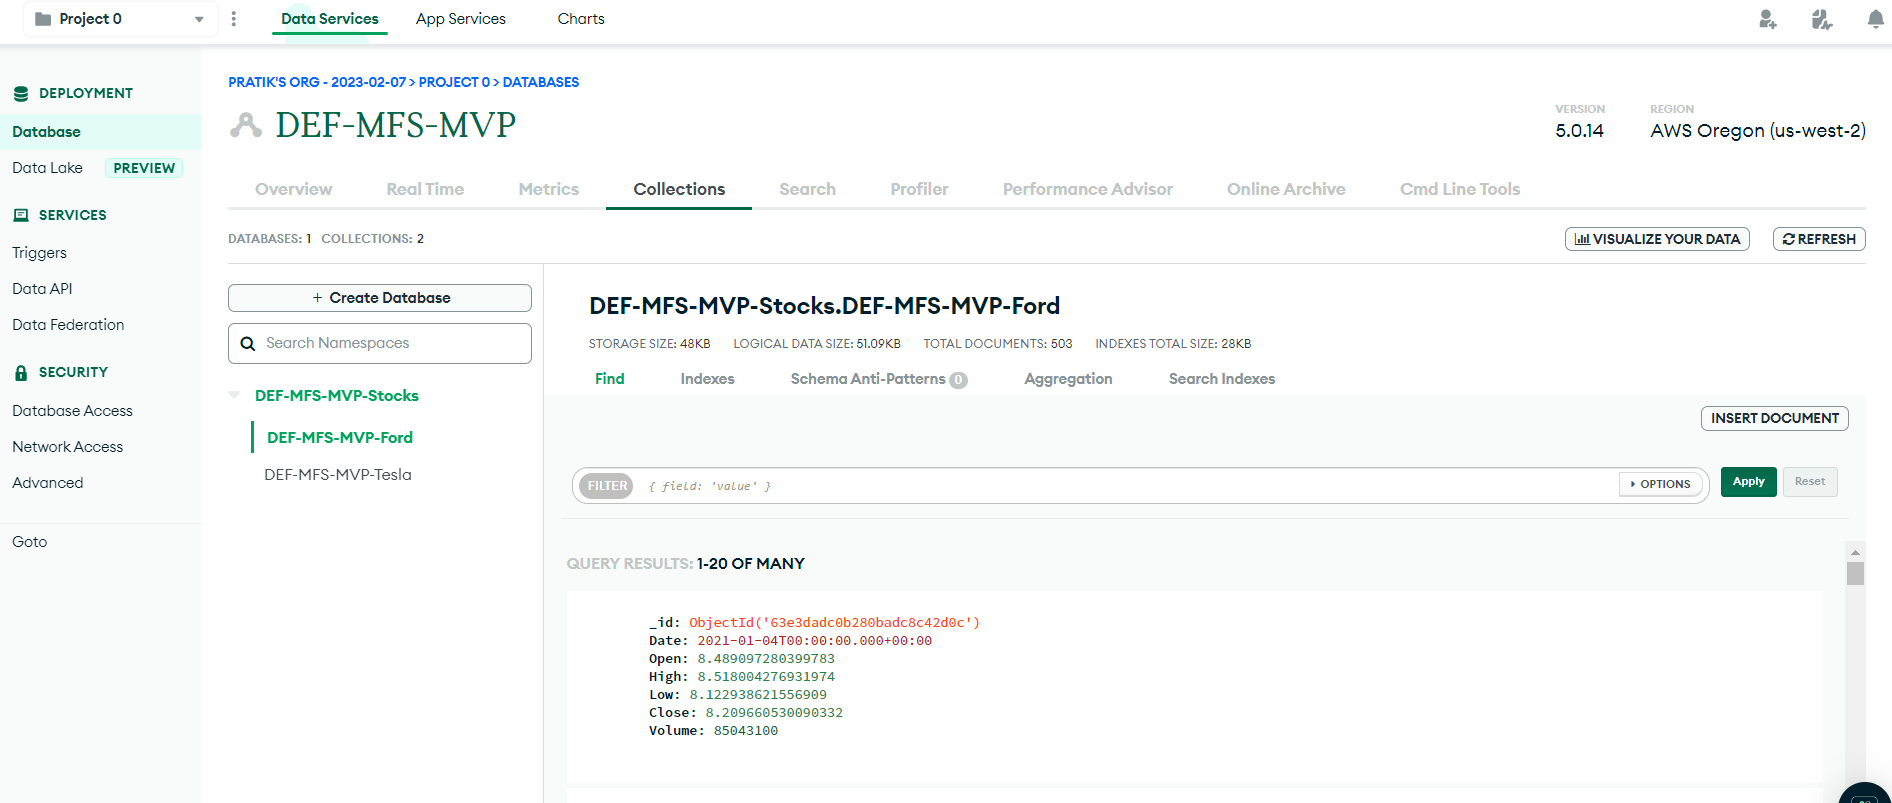

In [37]:
#retrive stock market data of Ford as list of dictionaries and dataframe
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [38]:
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_ford,Ford)
op.output_display()

[{'_id': ObjectId('63ed782b91778c9eaefd5256'),
  'Date': datetime.datetime(2021, 1, 4, 0, 0),
  'Open': 7.985666459145416,
  'High': 8.012859177642675,
  'Low': 7.641222188563385,
  'Close': 7.722801208496094,
  'Volume': 85043100},
 {'_id': ObjectId('63ed782b91778c9eaefd5257'),
  'Date': datetime.datetime(2021, 1, 5, 0, 0),
  'Open': 7.6774800191857695,
  'High': 7.904088040943216,
  'Low': 7.668415490849632,
  'Close': 7.84063720703125,
  'Volume': 70127800},
 {'_id': ObjectId('63ed782b91778c9eaefd5258'),
  'Date': datetime.datetime(2021, 1, 6, 0, 0),
  'Open': 7.967537569749369,
  'High': 8.103502029507577,
  'Low': 7.867830356889412,
  'Close': 8.012859344482422,
  'Volume': 72590200},
 {'_id': ObjectId('63ed782b91778c9eaefd5259'),
  'Date': datetime.datetime(2021, 1, 7, 0, 0),
  'Open': 8.10350288840135,
  'High': 8.230403698215982,
  'Low': 8.04911744451011,
  'Close': 8.212275505065918,
  'Volume': 77117100},
 {'_id': ObjectId('63ed782b91778c9eaefd525a'),
  'Date': datetime.date

In [39]:
#display the extracted Ford stock market data from MongoDB in a tabular structure.
#we use output class
op=output(df_from_db_ford,Ford)
op.output_display()

,_id,Date,Open,High,Low,Close,Volume
0,63ed782b91778c9eaefd5256,2021-01-04,7.985666,8.012859,7.641222,7.722801,85043100
1,63ed782b91778c9eaefd5257,2021-01-05,7.677480,7.904088,7.668415,7.840637,70127800
2,63ed782b91778c9eaefd5258,2021-01-06,7.967538,8.103502,7.867830,8.012859,72590200
3,63ed782b91778c9eaefd5259,2021-01-07,8.103503,8.230404,8.049117,8.212276,77117100
4,63ed782b91778c9eaefd525a,2021-01-08,8.248532,8.284789,8.058181,8.157888,59162200
...,...,...,...,...,...,...,...
498,63ed782b91778c9eaefd5448,2022-12-23,10.601654,10.723943,10.554619,10.686316,38200700
499,63ed782b91778c9eaefd5449,2022-12-27,10.611060,10.714538,10.469956,10.535805,44837400
500,63ed782b91778c9eaefd544a,2022-12-28,10.516991,10.582840,10.253596,10.300631,49375400
501,63ed782b91778c9eaefd544b,2022-12-29,10.422921,10.865049,10.394700,10.855641,53550300


## Statistical Analysis and Visualization

### Retrieve data from database

In [1]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [2]:
#for other python modules to main module/file
import import_ipynb

In [3]:
import DEF_MFS_MVP_Storage as storage_module

importing Jupyter notebook from DEF_MFS_MVP_Storage.ipynb


In [4]:
#define class object for mongoDB storage module class
mongoDB=storage_module.MongoDbAtlas()

In [5]:
#connect to database

In [6]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#connect to tesla database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [7]:
Tesla_collection

Collection(Database(MongoClient(host=['ac-3nkf60w-shard-00-01.pvo8fhv.mongodb.net:27017', 'ac-3nkf60w-shard-00-00.pvo8fhv.mongodb.net:27017', 'ac-3nkf60w-shard-00-02.pvo8fhv.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-14dt05-shard-0', tls=True), 'DEF-MFS-MVP-Stocks'), 'DEF-MFS-MVP-Tesla')

In [8]:
#this is the database we connected to in backend

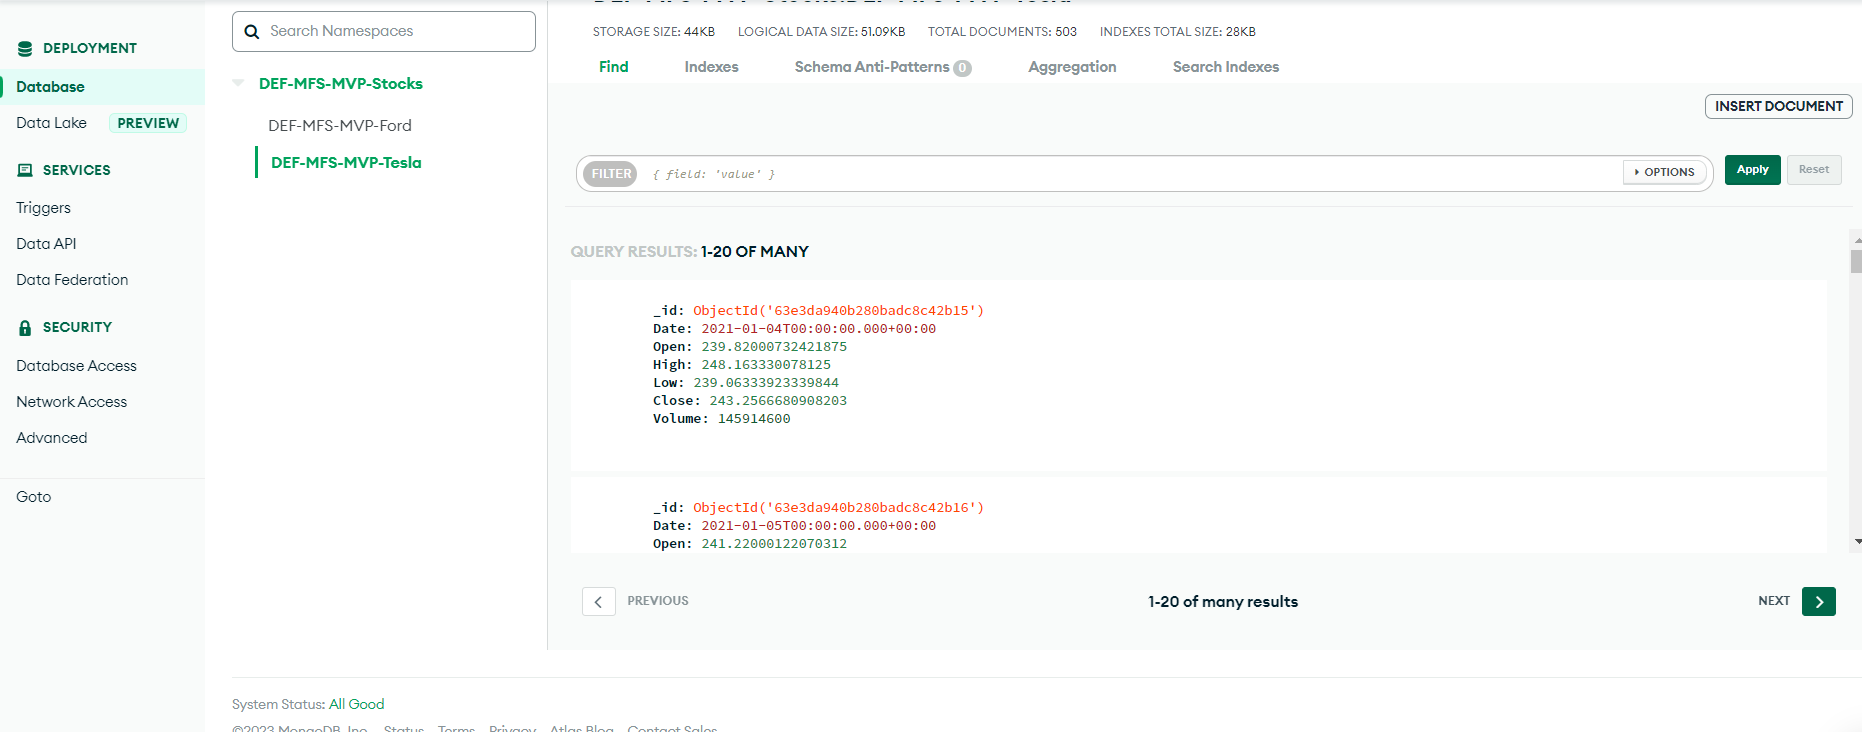

In [9]:
#retrive stock market data as list of dictionaries and dataframe
#this class was explained in previous task


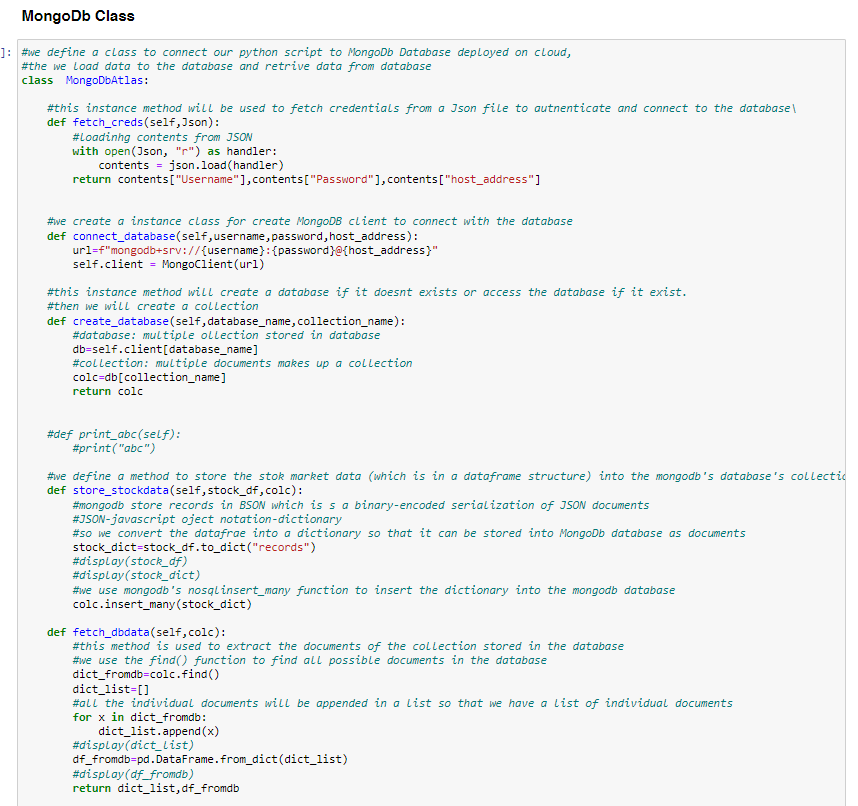

In [10]:
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [11]:
df_from_db_tesla

,_id,Date,Open,High,Low,Close,Volume
0,63ed782891778c9eaefd505f,2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
1,63ed782891778c9eaefd5060,2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2,63ed782891778c9eaefd5061,2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
3,63ed782891778c9eaefd5062,2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
4,63ed782891778c9eaefd5063,2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...,...,...
498,63ed782891778c9eaefd5251,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
499,63ed782891778c9eaefd5252,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
500,63ed782891778c9eaefd5253,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
501,63ed782891778c9eaefd5254,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300


### Statistical Analysis

In [12]:
# we'll be using the DEF_MFS_MVP_StatisticalAnalysis.ipynb to perform statistical analysis on our data and find any anomolies in the data

In [13]:
#importying StatisticalAnalysis module on our main DEF_MFS_MVP file
import DEF_MFS_MVP_StatisticalAnalysis as statistical_module

importing Jupyter notebook from DEF_MFS_MVP_StatisticalAnalysis.ipynb


In [14]:
#create a class object to find outliers and missing values
anom=statistical_module.Find_Anomolies(df_from_db_tesla)
anom

#### Finding Null Values

In [15]:
#we use check_null() function of Find_Anomolies class to check for any missing values
anom.check_null()

_id       0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no missing values in _id column 

There are no missing values in Date column 

There are no missing values in Open column 

There are no missing values in High column 

There are no missing values in Low column 

There are no missing values in Close column 

There are no missing values in Volume column 



#### From the above analysis, we see that there arent any missing values or Nan values in our stock market data.

#### Finding Outliers

In [16]:
#first we define the target features for which we will compute the outliers for
#our list of target features are
target_features=[ 'Open', 'High', 'Low', 'Close', 'Volume']
target_features

['Open', 'High', 'Low', 'Close', 'Volume']

In [17]:
#find outliers for each target features
for i in target_features:
    anom.check_outliers(i)

Open
Upper Limit : 411.02499771118164       Lower Limit : 111.62500381469727


,Date,Open
212,2021-11-04,411.470001
500,2022-12-28,110.349998


There are 2 outliers for Open target feature



High
Upper Limit : 416.94081115722656       Lower Limit : 116.18751525878906


,Date,High


There are 0 outliers for High target feature



Low
Upper Limit : 398.9549980163574       Lower Limit : 108.9416618347168


,Date,Low
212,2021-11-04,405.666656
213,2021-11-05,402.666656
499,2022-12-27,108.760002
500,2022-12-28,108.239998


There are 4 outliers for Low target feature



Close
Upper Limit : 407.3391456604004       Lower Limit : 112.71918106079102


,Date,Close
212,2021-11-04,409.970001
213,2021-11-05,407.363342
499,2022-12-27,109.099998
500,2022-12-28,112.709999


There are 4 outliers for Close target feature



Volume
Upper Limit : 150632325.0       Lower Limit : 9718125.0


,Date,Volume
3,2021-01-07,154496700
4,2021-01-08,225166500
5,2021-01-11,177904800
34,2021-02-23,199820700
41,2021-03-04,197758500
42,2021-03-05,268189500
43,2021-03-08,155361000
44,2021-03-09,202569900
45,2021-03-10,181817100
204,2021-10-25,188556300


There are 22 outliers for Volume target feature





#### Compute Statistical Characters

#### OPEN

In [18]:
#we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
OPEN=statistical_module.Statistical_character(df_from_db_tesla,"Open")
#describe feature target values
OPEN.calculate_statistic()

Open
Descriptive Statistics 



count    503.000000
mean     262.036667
std       55.712300
min      110.349998
25%      223.900002
50%      251.136673
75%      298.750000
max      411.470001
Name: Open, dtype: float64

In [19]:
#calculate minimum values
OPEN.calculate_min()
#calculate maximum values
OPEN.calculate_max()
#calculate range
OPEN.calculate_range()
#calculate mean of Open values
OPEN.calculate_mean()
#calculate median
OPEN.calculate_median()
#calculate variance
OPEN.calculate_variance()
#calculate standard deviation
OPEN.calculate_stddev()

Minimum of Open stock price is : 110.3499984741211
Maximum of Open stock price is : 411.4700012207031
Range of Open stock price is : 301.12000274658203
Mean of Open stock price is : 262.0366666274327
Median of Open stock price is : 251.1366729736328
Variance of Open stock price is : 3103.860387685165
Standard Deviation of Open stock price is : 55.71230014714134 



In [20]:
#statistical character in tabular structure
OPEN.stats_table()

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,110.349998
1,max,411.470001
2,range,301.120003
3,mean,262.036667
4,median,251.136673
5,variance,3103.860388
6,standard_deviation,55.712300


In [21]:
#we define a function to compute statistical values for each target features

def Descriptive_Statistics(target_feature):
    #we create class object for Statistical_character class to perform statistical analysis on different target features of our stock market data
    stat=statistical_module.Statistical_character(df_from_db_tesla,target_feature)
    #describe feature target values
    stat.calculate_statistic()
    #calculate minimum values
    stat.calculate_min()
    #calculate maximum values
    stat.calculate_max()
    #calculate range
    stat.calculate_range()
    #calculate mean 
    stat.calculate_mean()
    #calculate median
    stat.calculate_median()
    #calculate variance
    stat.calculate_variance()
    #calculate standard deviation
    stat.calculate_stddev()
    #statistical character in tabular structure
    stat.stats_table()

#### Open

In [22]:
Descriptive_Statistics("Open")

Open
Descriptive Statistics 



count    503.000000
mean     262.036667
std       55.712300
min      110.349998
25%      223.900002
50%      251.136673
75%      298.750000
max      411.470001
Name: Open, dtype: float64

Minimum of Open stock price is : 110.3499984741211
Maximum of Open stock price is : 411.4700012207031
Range of Open stock price is : 301.12000274658203
Mean of Open stock price is : 262.0366666274327
Median of Open stock price is : 251.1366729736328
Variance of Open stock price is : 3103.860387685165
Standard Deviation of Open stock price is : 55.71230014714134 

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,110.349998
1,max,411.470001
2,range,301.120003
3,mean,262.036667
4,median,251.136673
5,variance,3103.860388
6,standard_deviation,55.712300


#### Close

In [23]:
Descriptive_Statistics("Close")

Close
Descriptive Statistics 



count    503.000000
mean     261.542545
std       55.775860
min      109.099998
25%      223.201668
50%      251.213333
75%      296.856659
max      409.970001
Name: Close, dtype: float64

Minimum of Close stock price is : 109.0999984741211
Maximum of Close stock price is : 409.9700012207031
Range of Close stock price is : 300.87000274658203
Mean of Close stock price is : 261.5425449014895
Median of Close stock price is : 251.2133331298828
Variance of Close stock price is : 3110.946505305992
Standard Deviation of Close stock price is : 55.775859520997 

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,109.099998
1,max,409.970001
2,range,300.870003
3,mean,261.542545
4,median,251.213333
5,variance,3110.946505
6,standard_deviation,55.775860


#### High

In [24]:
Descriptive_Statistics("High")

High
Descriptive Statistics 



count    503.000000
mean     267.900537
std       57.100094
min      116.269997
25%      228.970001
50%      254.979996
75%      304.158325
max      414.496674
Name: High, dtype: float64

Minimum of High stock price is : 116.2699966430664
Maximum of High stock price is : 414.4966735839844
Range of High stock price is : 298.22667694091797
Mean of High stock price is : 267.9005365542342
Median of High stock price is : 254.97999572753906
Variance of High stock price is : 3260.4207079189805
Standard Deviation of High stock price is : 57.100093764537554 

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,116.269997
1,max,414.496674
2,range,298.226677
3,mean,267.900537
4,median,254.979996
5,variance,3260.420708
6,standard_deviation,57.100094


#### Low

In [25]:
Descriptive_Statistics("Low")

Low
Descriptive Statistics 



count    503.000000
mean     255.369443
std       54.201024
min      108.239998
25%      217.696663
50%      244.203339
75%      290.199997
max      405.666656
Name: Low, dtype: float64

Minimum of Low stock price is : 108.23999786376953
Maximum of Low stock price is : 405.6666564941406
Range of Low stock price is : 297.4266586303711
Mean of Low stock price is : 255.36944328292938
Median of Low stock price is : 244.20333862304688
Variance of Low stock price is : 2937.751011397839
Standard Deviation of Low stock price is : 54.201024080711235 

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,108.239998
1,max,405.666656
2,range,297.426659
3,mean,255.369443
4,median,244.203339
5,variance,2937.751011
6,standard_deviation,54.201024


#### Volume

In [26]:
Descriptive_Statistics("Volume")

Volume
Descriptive Statistics 



count    5.030000e+02
mean     8.454994e+07
std      3.315808e+07
min      2.940180e+07
25%      6.256095e+07
50%      7.892820e+07
75%      9.778950e+07
max      2.681895e+08
Name: Volume, dtype: float64

Minimum of Volume stock price is : 29401800
Maximum of Volume stock price is : 268189500
Range of Volume stock price is : 238787700
Mean of Volume stock price is : 84549936.97813122
Median of Volume stock price is : 78928200.0
Variance of Volume stock price is : 1099458553733092.1
Standard Deviation of Volume stock price is : 33158084.28925127 

Statistical Characteristic in tabular form: 



,Statistical_Charecteristic,Values
0,min,2.940180e+07
1,max,2.681895e+08
2,range,2.387877e+08
3,mean,8.454994e+07
4,median,7.892820e+07
5,variance,1.099459e+15
6,standard_deviation,3.315808e+07
